In [129]:
import pandas as pd

data = pd.read_csv (r"/Users/silviaserafini/ironhack/PROGETTI/sharcks_clean.csv",encoding='latin-1')
df = pd.DataFrame(data)
display(df.head())
print(df.shape)


,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Fatal,NotFatal,Species
0,17,2018.04.30.R,Reported 30-Apr-2018,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,female,M,unknown,Minor injury to ankle,unknown,0,1,tiger
1,14,2018.05.00,May 2018,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,unknown,0,1,blacktip
2,37,2018.03.09.b,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,69,"No injury, said to have been charged by sharks...",15h30,0,1,unknown
3,38,2018.03.09.a,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,18,"Minor injury, ankle grazed",07h30,0,1,wobbegong
4,35,2018.03.31,31-Mar-2018,2018,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,09h30,0,1,small


(5627, 17)


In [130]:
df["fiveYears"] = pd.cut(df.Year, bins=[1979,1984,1989,1994,1999,2004,2009,2014,2019], labels=range(1980,2020,5))

#transformation of 

In [131]:

display(df.head())
df["fiveYears"].value_counts()

,Unnamed: 0,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Time,Fatal,NotFatal,Species,fiveYears
0,17,2018.04.30.R,Reported 30-Apr-2018,2018,Unprovoked,THAILAND,Hua Hin,Sai Noi Beach,Swimming,female,M,unknown,Minor injury to ankle,unknown,0,1,tiger,2015
1,14,2018.05.00,May 2018,2018,Provoked,AUSTRALIA,Westerm Australia,Dugong Bay,Feeding sharks,Melisa Brunning,F,34,Shallow lacerations to finger PROVOKED INCIDENT,unknown,0,1,blacktip,2015
2,37,2018.03.09.b,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Lorne,Swimming,Rob Crossland,M,69,"No injury, said to have been charged by sharks...",15h30,0,1,unknown,2015
3,38,2018.03.09.a,9-Mar-2018,2018,Unprovoked,AUSTRALIA,Victoria,Winkipop,Surfing,Lachie Brown,M,18,"Minor injury, ankle grazed",07h30,0,1,wobbegong,2015
4,35,2018.03.31,31-Mar-2018,2018,Unprovoked,USA,Hawaii,Kukio Beach,Stand-Up Paddleboarding,male,M,25,Injuries to right leg & hand,09h30,0,1,small,2015


2010    555
2005    505
2000    426
2015    418
1995    306
1990    232
1985    196
1980    191
Name: fiveYears, dtype: int64

# Focus on Fatal vs not Fatal attacks  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


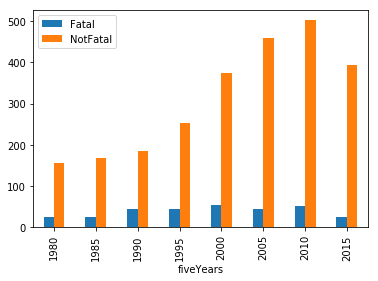

In [132]:
#cration of a temp database discarding 'unknown' values

#print(type(df.loc[(df["Fatal" ] != 'unknown')]))
temp=df[df["Fatal" ] != 'unknown']
temp["Fatal"]=pd.to_numeric(temp["Fatal"])
temp["NotFatal"]=pd.to_numeric(temp["NotFatal"])

#discard the old entries(previous than 1970)
temp=temp[temp['Year'] > 1970]

#plot of the 'Fatal' and 'NotFatal' values during the 5 years bins

%matplotlib inline
temp.groupby("fiveYears").agg({"Fatal": "sum","NotFatal":"sum"}).plot.bar()




# Focus on type of attacks resulted in fatal outcome

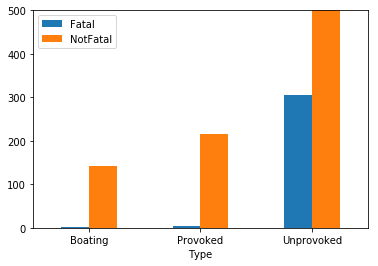

In [133]:
temp1=temp.groupby(["fiveYears","Type"]).agg({"Fatal": "sum","NotFatal":"sum"}).reset_index()
temp1.groupby("Type").agg({"Fatal": "sum","NotFatal":"sum"}).plot.bar(rot=0,ylim=(0,500))
#temp.head()

In [ ]:
#Most of the fatal attacks are the result of "unprovocked" Sharcks attacks. This shows that the sharks are predators.

# Focus on most dangerous species

In [ ]:
#I am considering only the top 5 most relevant species
